# Analyzing Presidential Election With Twitter

Would it have been possible to predict winner of presidential election earlier with Twitter? 


# Setting Up Twitter Developer Account Linked To Profile

## Initialize Connection

In [3]:
import tweepy #Connection to Twitter
import json #Output from Twitter
import time #How the computer is going to see the time

In [4]:
#ConsumerKey, consumer secret, access token, access secret 
ckey = 'MEynE0kRbK0Zxl0JZxbbH2dLb'
csecret = 'viYv8XalQzp643oTMbVmXzF4QLekgDjXm5nCmWmUMEBmn91JR1'
atoken= '862164338936860675-tyzXrNk5yQZRHFacACx8jSNwTKE9uj7'
asecret = 'BAI4pZnsFMKjGyXZfRp4cLxS5PoyADqpNGScnmry932gt'

In [5]:
#Instantiating Objects of Authentication
auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

## Testing the Connection

In [6]:
#Create The Actual Interface
api = tweepy.API(auth)

#api.update_status("Hello Updating From iPython")
user = api.me()

In [7]:
print(user.name)
print(user.location)
print(user.friends_count)

Tomoki Lam

0


# Streaming Presidential Election Tweets

In [8]:
# Initializing a listener class that streams Twitter status
class StdOutListener(tweepy.StreamListener):
    def on_data(self,data):
        try:
            with open ('tweets', 'a') as file:
                file.write(data)
                return True
        except BaseException as e:
            print(str(e))
    def on_error(self,status):
        print(status)
        
        
#This handles Twitter authentiication and the connection to Twitter Streaming API
listener = StdOutListener()
stream = tweepy.Stream(auth, listener)

#This line filter Twitter Streams to capture data by the keywords: 'trump', 'hillary'
try:    
    stream.filter(track=['trump','hillary'])
except KeyboardInterrupt:
        print("Twitter Download is interrupted")      

Twitter Download is interrupted


# Exploring Data 

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

In [10]:
#Get data of Twitter Stream
tweets_data_path = 'tweets'

tweets_data =[]
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
len(tweets_data)

6072

In [11]:
#Sample Twitter Data Received
tweets_data[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 10 05:28:05 +0000 2017',
 'display_text_range': [28, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/8…',
    'expanded_url': 'https://twitter.com/i/web/status/862177401559801856',
    'indices': [117, 140],
    'url': 'https://t.co/lRWSYNQUUm'}],
  'user_mentions': [{'id': 329276155,
    'id_str': '329276155',
    'indices': [0, 9],
    'name': 'D Young',
    'screen_name': 'statto99'},
   {'id': 14157134,
    'id_str': '14157134',
    'indices': [10, 17],
    'name': 'Robert Peston',
    'screen_name': 'Peston'},
   {'id': 87818409,
    'id_str': '87818409',
    'indices': [18, 27],
    'name': 'The Guardian',
    'screen_name': 'guardian'}]},
 'extended_tweet': {'display_text_range': [28, 168],
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 329276155,
     'id_str': '329276155',
     'indices': [0, 9],
     'name'

In [12]:
#How to parse out certain key from json
tweets_data[0]['text']

'@statto99 @Peston @guardian The machine behind Brexit and Trump is far, far more influential and cynical than a loc… https://t.co/lRWSYNQUUm'

In [13]:
from datetime import datetime

In [14]:
#Pass in a Tweet JSON Data (tweet) and the key to get (element)
def getText(tweet, element):
    try:
        return tweet[element]
    except KeyError:
        pass
    
tweetsDF = pd.DataFrame()
tweetsDF['text'] =[getText(tweet, 'text') for tweet in tweets_data]
tweetsDF['lang'] = [getText(tweet,'lang') for tweet in tweets_data]
tweetsDF['created_at'] = [getText(tweet,'created_at') for tweet in tweets_data]
tweetsDF['created_at'] = pd.to_datetime(tweetsDF['created_at'],errors='ignore')
tweetsDF.set_index('created_at',inplace=True)

In [15]:
tweetsDF.head()

,text,lang
created_at,,
2017-05-10 05:28:05,@statto99 @Peston @guardian The machine behind...,en
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en
2017-05-10 05:28:05,RT @JoyAnnReid: Meanwhile... https://t.co/S6xB...,en
2017-05-10 05:28:05,"Donald Trump fires FBI Director James Comey, s...",en
2017-05-10 05:28:05,@nytimes this letter proves Trump is not under...,en


## Removing Empty Texts 

In [16]:
tweetsDF.dropna(axis=0, how="any", inplace=True)
tweetsDF.isnull().sum()

text    0
lang    0
dtype: int64

## What Languages Are Used in Twitter Data Feed?

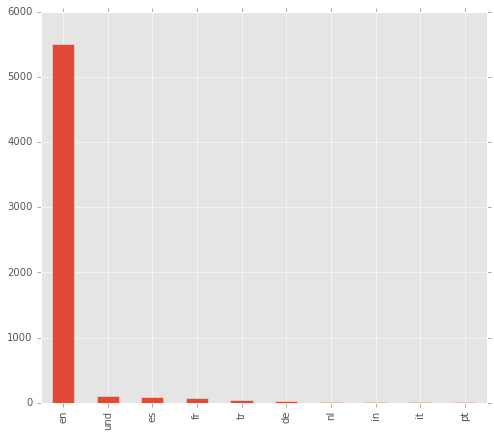

In [17]:
tweets_by_lang = tweetsDF['lang'].value_counts()
tweets_by_lang.head(10).plot(kind="bar")

English is clearly the dominant language used in Tweet Data. This will make it easier to analyze.

In [18]:
#Import Regular Expressions
import re

In [19]:
#Want to see if certain tweet has the word 'Trump' or 'Hillary'
def word_in_text(word, text):
    try:
        text = text.lower()
        match = re.search(word, text)
        if match:
            return True
        return False
    except AttributeError:
        return False

In [20]:
#See how many tweets talk about each Presidential Candidate

tweetsDF['trump'] = tweetsDF['text'].apply(lambda tweet: word_in_text('trump', tweet))
tweetsDF['hillary'] = tweetsDF['text'].apply(lambda tweet: word_in_text('hillary', tweet))

In [21]:
#Retrun only the tweets that gives true for each candidate
print('Trump Tweet Count:',  tweetsDF['trump'].value_counts()[1])
print('Hillary Tweet Count:', tweetsDF['hillary'].value_counts()[1])

Trump Tweet Count: 4628
Hillary Tweet Count: 473


In [22]:
tweetsDF.head()

,text,lang,trump,hillary
created_at,,,,
2017-05-10 05:28:05,@statto99 @Peston @guardian The machine behind...,en,True,False
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en,False,True
2017-05-10 05:28:05,RT @JoyAnnReid: Meanwhile... https://t.co/S6xB...,en,False,False
2017-05-10 05:28:05,"Donald Trump fires FBI Director James Comey, s...",en,True,False
2017-05-10 05:28:05,@nytimes this letter proves Trump is not under...,en,True,False


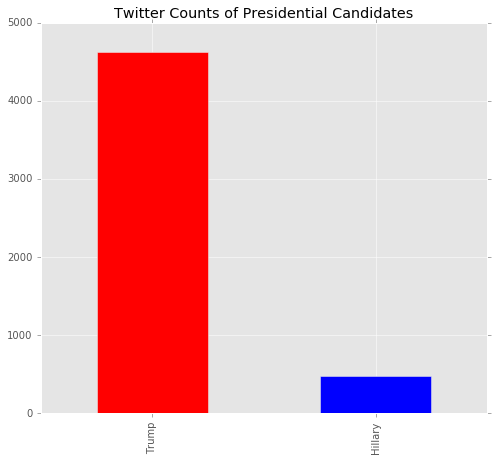

In [23]:
#Putting Results Into A Bar Graph
presidential_candidates = ['Trump', 'Hillary']
tweets_of_pres_candidates = [[tweetsDF['trump'].value_counts()[1], tweetsDF['hillary'].value_counts()[1]]]

candidate_frame = pd.DataFrame(tweets_of_pres_candidates, columns=presidential_candidates)

candidate_frame.T.plot(kind='bar', legend=False, title="Twitter Counts of Presidential Candidates", color='rb')


In [24]:
#To see individual candidates "tweets" 
tweetsDF[tweetsDF.hillary == True].head()

,text,lang,trump,hillary
created_at,,,,
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en,False,True
2017-05-10 05:28:06,Dems should be happy Comey was fired. #Hillary...,en,True,True
2017-05-10 05:28:02,RT @larryelder: Hillary blames Comey for her d...,en,True,True
2017-05-10 05:28:06,@reubsmoves yeah hillary had her fallbacks but...,en,False,True
2017-05-10 05:28:06,@thee_stupid You will be a sleep a very long t...,en,False,True


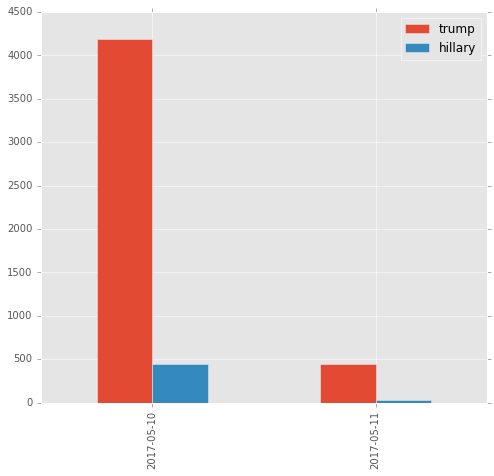

In [28]:
#Exploring tweet counts by each date
trump_tweets_by_date = tweetsDF.trump.groupby(tweetsDF.index.date).sum()
hillary_tweets_by_date = tweetsDF.hillary.groupby(tweetsDF.index.date).sum()

# Getting a dataframe of both tweets over time
pd.concat([trump_tweets_by_date, hillary_tweets_by_date], axis=1).plot(kind='bar')

# Sentimental Analysis

## Generating the Polarity and Subjectivity (Sentiment Values)

In [30]:
#We will use the text blob library to analyze sentiment
from textblob import TextBlob

In [32]:
def find_polarity(tweet):
    return TextBlob(tweet).polarity

def find_subjectivity(tweet):
    return TextBlob(tweet).subjectivity

#Applying textblob to each tweets text
tweetsDF['Polarity'] = tweetsDF['text'].apply(lambda tweet: find_polarity(tweet))
tweetsDF['Subjectivity'] = tweetsDF['text'].apply(lambda tweet: find_subjectivity(tweet))


In [34]:
tweetsDF.head()

,text,lang,trump,hillary,Polarity,Subjectivity
created_at,,,,,,
2017-05-10 05:28:05,@statto99 @Peston @guardian The machine behind...,en,True,False,-0.06000,0.84000
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en,False,True,0.00000,0.00000
2017-05-10 05:28:05,RT @JoyAnnReid: Meanwhile... https://t.co/S6xB...,en,False,False,0.00000,0.00000
2017-05-10 05:28:05,"Donald Trump fires FBI Director James Comey, s...",en,True,False,0.00000,0.10000
2017-05-10 05:28:05,@nytimes this letter proves Trump is not under...,en,True,False,-0.00625,0.34375


In [35]:
tweetsDF.describe()

,Polarity,Subjectivity
count,5912.000000,5912.000000
mean,0.021806,0.291878
std,0.257631,0.328670
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.125000
75%,0.031771,0.550000
max,1.000000,1.000000


In [37]:
#Categorizing satisfactions based on polarity
tweetsDF['PolarityCategory'] = pd.cut(tweetsDF.Polarity, 3, labels=["unhappy","neutral","happy"])
tweetsDF['SubjectivityCategory'] = pd.cut(tweetsDF.Subjectivity, 2, labels=["meaningful", "subjective"])

In [38]:
tweetsDF.head()

,text,lang,trump,hillary,Polarity,Subjectivity,PolarityCategory,SubjectivityCategory
created_at,,,,,,,,
2017-05-10 05:28:05,@statto99 @Peston @guardian The machine behind...,en,True,False,-0.06000,0.84000,neutral,subjective
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en,False,True,0.00000,0.00000,neutral,meaningful
2017-05-10 05:28:05,RT @JoyAnnReid: Meanwhile... https://t.co/S6xB...,en,False,False,0.00000,0.00000,neutral,meaningful
2017-05-10 05:28:05,"Donald Trump fires FBI Director James Comey, s...",en,True,False,0.00000,0.10000,neutral,meaningful
2017-05-10 05:28:05,@nytimes this letter proves Trump is not under...,en,True,False,-0.00625,0.34375,neutral,meaningful


## Plotting Out Sentimental Analysis

Seperating Trump vs Hillary Tweets and its respective sentiments

In [39]:
trumpTweets = tweetsDF[tweetsDF.trump == True]
hillaryTweets = tweetsDF[tweetsDF.hillary == True]

Polarity Analysis

In [40]:
trumpPolarityCount = trumpTweets['PolarityCategory'].value_counts().rename("trump")
hillaryPolarityCount = hillaryTweets['PolarityCategory'].value_counts().rename("hillary")

In [44]:
presidentialPolarityCounty = pd.concat([trumpPolarityCount, hillaryPolarityCount], axis=1)

In [46]:
presidentialPolarityCounty

,trump,hillary
neutral,3850,359
happy,491,68
unhappy,287,46
